In [1]:
#Call the library 
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Importing data
da = pd.read_csv(r'C:\Users\qurashilu\Desktop/Invistico_Airline.csv')
da

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
# Check size of the data set 
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
#check null values
da.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [5]:
# To describe Arrival Delay in Minutes
da['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [6]:
#To Drop the null value
da_c=da.copy()
da.dropna(inplace=True)

In [7]:
#check null values
da.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [8]:
#Check count 
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(da[c].value_counts()))
da['satisfaction']=da['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



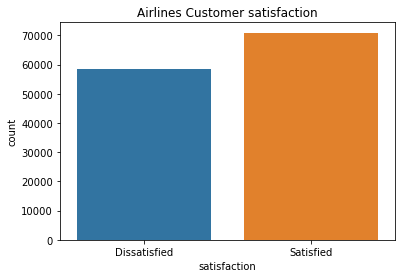

In [9]:
sn.countplot(x="satisfaction", data=da)
plt.title('Airlines Customer satisfaction')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

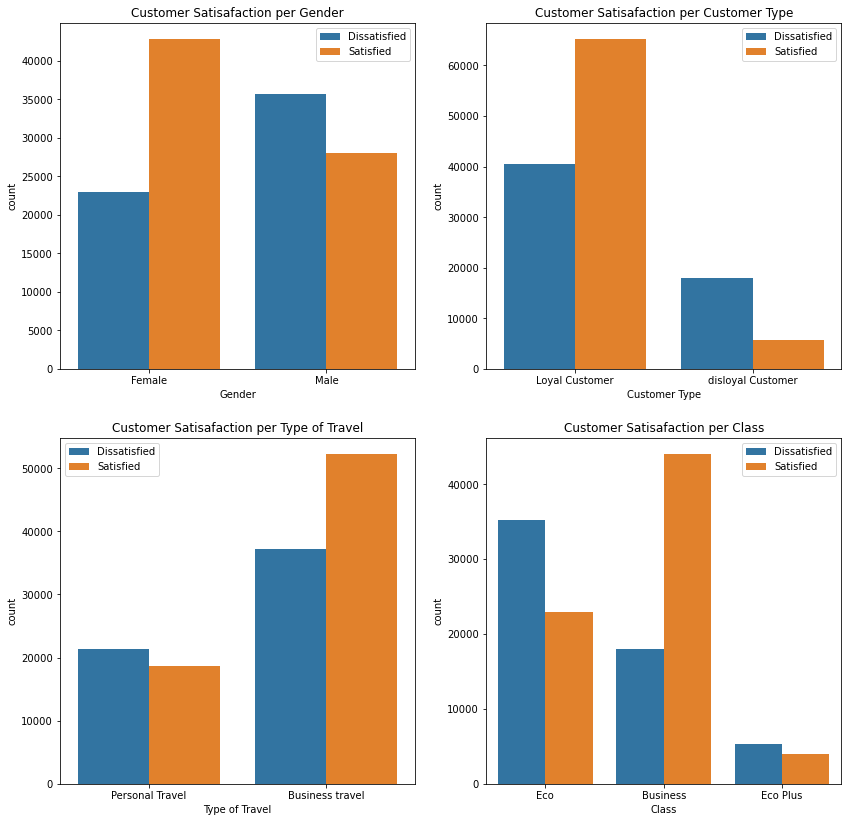

In [10]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sn.countplot(data=da,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

<ipython-input-11-d0422ee9788e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

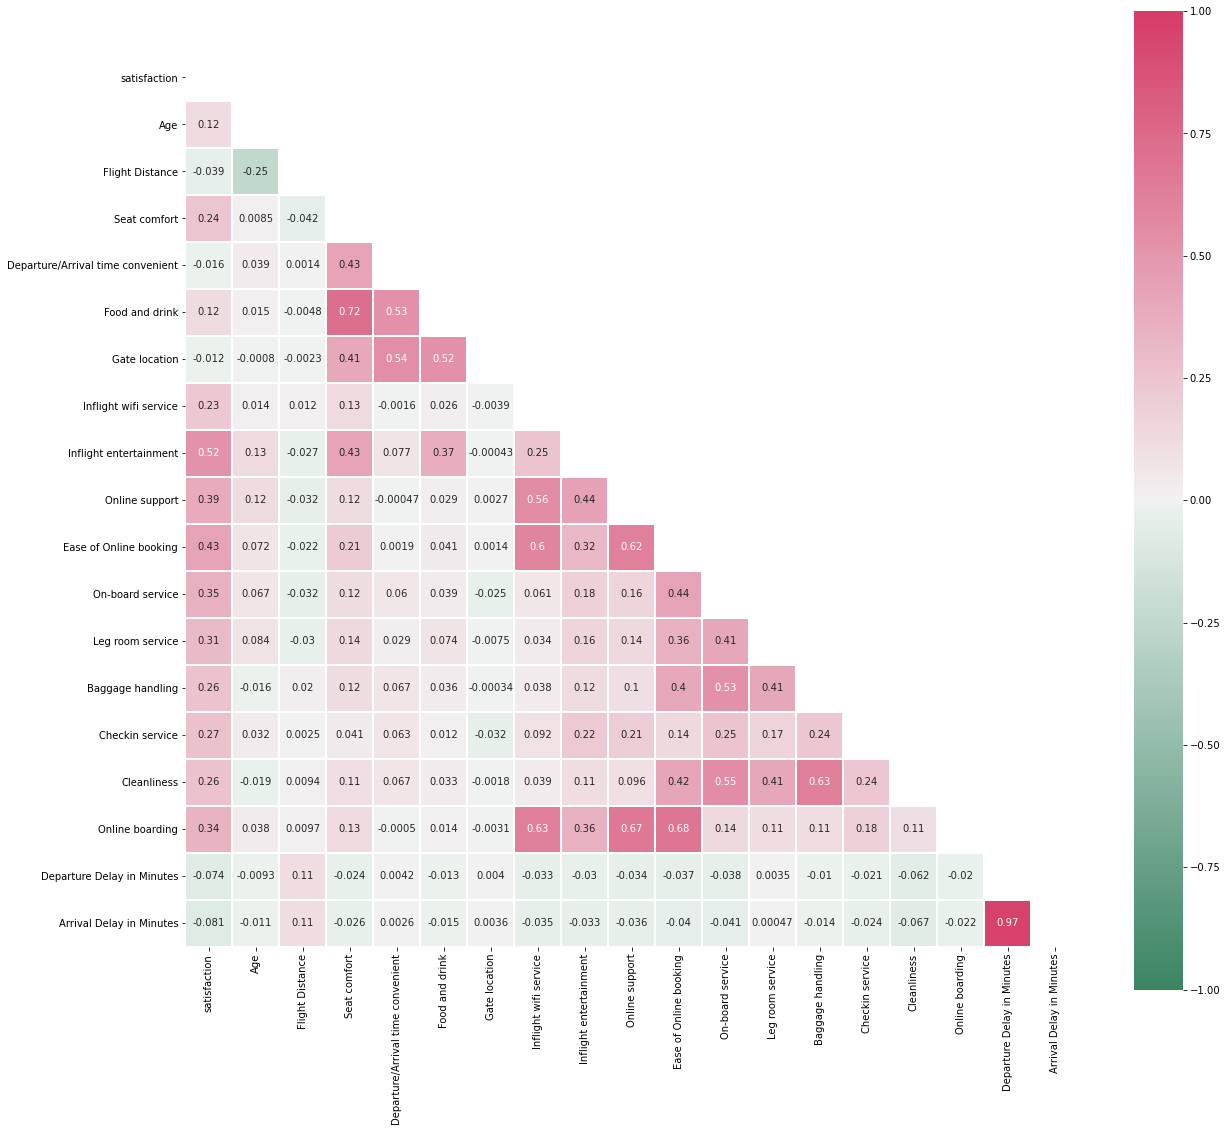

In [11]:
#correlation
corr = da.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sn.diverging_palette(150, 1, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1 , center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [13]:
#Convert categorical variable into dummy variables.
dummyda=pd.get_dummies(da)

In [14]:
#Print Dummyda
dummyda

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,...,0.0,1,0,1,0,0,1,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,305.0,0,1,1,0,0,1,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,...,0.0,1,0,1,0,0,1,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,0.0,1,0,1,0,0,1,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,0.0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,3,2,5,2,...,0.0,1,0,0,1,0,1,0,1,0
129876,0,63,2087,2,3,2,4,2,1,1,...,172.0,0,1,0,1,0,1,1,0,0
129877,0,69,2320,3,0,3,3,3,2,2,...,163.0,0,1,0,1,0,1,0,1,0
129878,0,66,2450,3,2,3,2,3,2,2,...,205.0,0,1,0,1,0,1,0,1,0


In [15]:
target=dummyda["satisfaction"]
dummyda.drop("satisfaction",axis=1,inplace=True)

In [24]:
# Initialise the Scaler
scaler = StandardScaler()
col=dummyda.columns
scaled_da = pd.DataFrame(data=scaler.fit_transform(dummyda),columns=col)

In [25]:
scaled_da["satisfaction"]=target.astype(int)

In [26]:
print("target ", target.shape)
print("scaled ", scaled_da.shape)

target  (129487,)
scaled  (129487, 28)


In [27]:
#check null values
scaled_da.isnull().sum()

Age                                    0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes               0
Gender_Female                          0
Gender_Male                            0
Customer Type_Loyal Customer           0
Customer Type_disloyal Customer        0
Type of Travel_Business travel         0
Type of Travel_Personal Travel         0
Class_Business  

In [28]:
#Train & Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_da.drop('satisfaction', axis = 1),
                                                    target, test_size=0.2)

In [29]:
#Print Train Data
X_train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
69979,-2.078960,0.774181,-0.602057,0.006367,0.102506,0.007368,-0.947223,-1.028077,-1.929057,-1.127610,...,-0.392329,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,-0.958338,1.108170,-0.279458
34448,1.360753,-0.448941,0.833829,0.661169,0.795228,-1.524128,1.327641,0.457857,1.132978,1.170241,...,-0.392329,-1.014931,1.014931,0.473495,-0.473495,-1.494583,1.494583,-0.958338,-0.902389,3.578349
79913,1.493050,-0.984544,0.115886,-0.648436,-0.590215,-0.758380,0.569353,-1.028077,-1.929057,-0.361660,...,0.101620,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,-0.958338,1.108170,-0.279458
19398,-1.880515,-0.104208,-1.320000,0.661169,-1.282937,-1.524128,0.569353,0.457857,0.367469,1.170241,...,-0.340334,0.985288,-0.985288,0.473495,-0.473495,-1.494583,1.494583,1.043473,-0.902389,-0.279458
106952,0.434677,-0.591120,0.833829,0.661169,0.795228,0.773117,-0.947223,1.200825,1.132978,0.404291,...,-0.210348,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88543,0.037786,-0.051621,0.115886,0.006367,0.102506,0.007368,1.327641,0.457857,0.367469,-0.361660,...,-0.314337,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
51810,-0.623697,-0.632994,0.115886,-0.648436,0.102506,0.007368,-1.705512,-0.285110,-1.929057,-1.893560,...,-0.392329,0.985288,-0.985288,-2.111957,2.111957,0.669083,-0.669083,-0.958338,1.108170,-0.279458
73601,-2.012812,2.774414,-0.602057,-1.303239,-1.282937,-1.524128,-0.947223,-1.028077,-1.163548,-1.127610,...,2.363387,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
86427,1.228457,-1.543519,-0.602057,-0.648436,1.487949,-0.758380,-0.947223,1.200825,0.367469,0.404291,...,0.335596,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458


In [31]:
#Print Train Data
y_train

70197     0
34574     0
80157     0
19474     1
107273    1
         ..
88816     1
51980     0
73832     0
86693     1
25064     1
Name: satisfaction, Length: 103589, dtype: int64

In [32]:
#Print Test Data
X_test

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
77694,1.294605,-1.344859,0.833829,0.661169,0.795228,0.773117,-0.947223,1.200825,0.367469,-0.361660,...,-0.392329,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
123239,2.088385,1.575638,-1.320000,-1.303239,-1.282937,-1.524128,0.569353,-1.028077,1.132978,1.170241,...,-0.392329,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
56160,-0.954439,0.352515,0.115886,1.315972,0.102506,-1.524128,-1.705512,-0.285110,-1.929057,-1.893560,...,-0.392329,-1.014931,1.014931,-2.111957,2.111957,0.669083,-0.669083,1.043473,-0.902389,-0.279458
89476,-1.086735,0.991344,0.833829,0.661169,-0.590215,0.773117,0.569353,0.457857,0.367469,0.404291,...,-0.392329,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
82293,-0.226807,0.137300,0.115886,0.006367,-0.590215,0.007368,0.569353,0.457857,1.132978,-0.361660,...,-0.262342,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39416,-0.888290,-0.453810,1.551772,1.315972,1.487949,-1.524128,0.569353,1.200825,0.367469,0.404291,...,-0.392329,0.985288,-0.985288,0.473495,-0.473495,-1.494583,1.494583,1.043473,-0.902389,-0.279458
110702,0.103935,-1.058555,-1.320000,-1.303239,-1.282937,-1.524128,-0.947223,0.457857,1.132978,1.170241,...,-0.392329,-1.014931,1.014931,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458
10595,-0.557549,0.142169,-1.320000,-1.303239,1.487949,-1.524128,0.569353,0.457857,0.367469,0.404291,...,-0.392329,0.985288,-0.985288,0.473495,-0.473495,-1.494583,1.494583,-0.958338,1.108170,-0.279458
127275,0.963863,1.506496,0.833829,0.661169,0.795228,0.773117,0.569353,1.200825,1.132978,1.170241,...,-0.184350,0.985288,-0.985288,0.473495,-0.473495,0.669083,-0.669083,1.043473,-0.902389,-0.279458


In [33]:
#Print Test Data
y_test

77935     1
123613    1
56349     0
89753     1
82544     1
         ..
39558     1
111034    1
10645     1
127663    1
122559    1
Name: satisfaction, Length: 25898, dtype: int64

In [34]:
y_test.shape

(25898,)

In [35]:
X_test.shape

(25898, 27)

In [36]:
#Modeling
##Call the library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.62
Test Accuracy: % 83.27


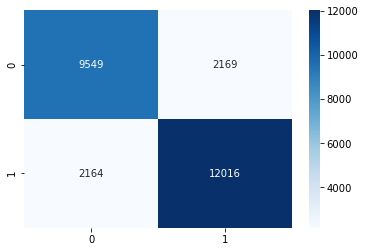

In [38]:
#Confusion Matrix
y_pred=logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True,fmt="d", cmap = 'Blues') 
plt.show()